In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [2]:
train_data = pd.read_excel("D://asu//Big data data//flight fare prediction//Data_Train.xlsx")

In [36]:
train_data.head(20)

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45
5,SpiceJet,Kolkata,Banglore,0,3873,24,6,9,0,11,25,2,25
6,Jet Airways,Banglore,New Delhi,1,11087,12,3,18,55,10,25,15,30
7,Jet Airways,Banglore,New Delhi,1,22270,1,3,8,0,5,5,21,5
8,Jet Airways,Banglore,New Delhi,1,11087,12,3,8,55,10,25,25,30
9,Multiple carriers,Delhi,Cochin,1,8625,27,5,11,25,19,15,7,50


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [6]:
train_data["Duration"].value_counts()

2h 50m     550
1h 30m     386
2h 55m     337
2h 45m     337
2h 35m     329
          ... 
32h 55m      1
31h 30m      1
33h 20m      1
27h 30m      1
28h 30m      1
Name: Duration, Length: 368, dtype: int64

In [7]:
train_data.shape

(10683, 11)

In [8]:
train_data.dropna(inplace=True)

In [9]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [10]:
#EDA 
#Convert the object data type into timestamp for prediction.
#Extract Date_of_Journey
train_data["Journey_day"] =pd.to_datetime(train_data["Date_of_Journey"],format="%d/%m/%Y").dt.day
train_data["Journey_month"] =pd.to_datetime(train_data["Date_of_Journey"],format="%d/%m/%Y").dt.month
#Extract Dep_Time
train_data["Dep_hour"] = pd.to_datetime(train_data["Dep_Time"]).dt.hour
train_data["Dep_min"] = pd.to_datetime(train_data["Dep_Time"]).dt.minute
#Extract Arrival_Time
train_data["Arrival_hour"] = pd.to_datetime(train_data["Arrival_Time"]).dt.hour
train_data["Arrival_min"] = pd.to_datetime(train_data["Arrival_Time"]).dt.minute

#Duration
duration = list(train_data["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m" 
        else:
            duration[i] = "0h " + duration[i]

dh = []
dm = []
for i in range(len(duration)):
    dh.append(int(duration[i].split(sep = "h")[0]))
    dm.append(int(duration[i].split(sep = "m")[0].split()[-1]))
    
train_data["Duration_hours"] = dh
train_data["Duration_mins"] =dm

#Drop the original columns
train_data.drop(["Date_of_Journey"], axis = 1, inplace = True)
train_data.drop(["Dep_Time"], axis = 1, inplace = True)
train_data.drop(["Arrival_Time"], axis = 1, inplace = True)
train_data.drop(["Duration"], axis =1, inplace=True)

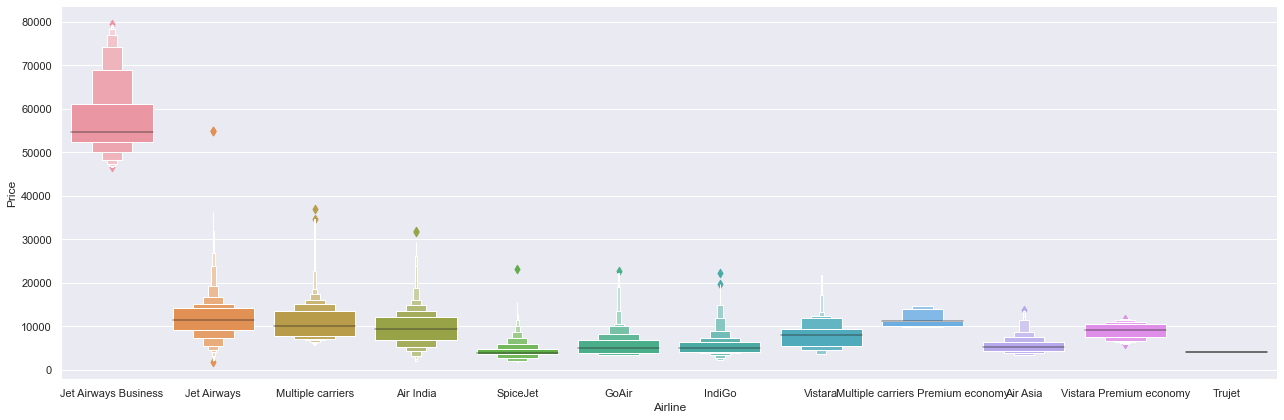

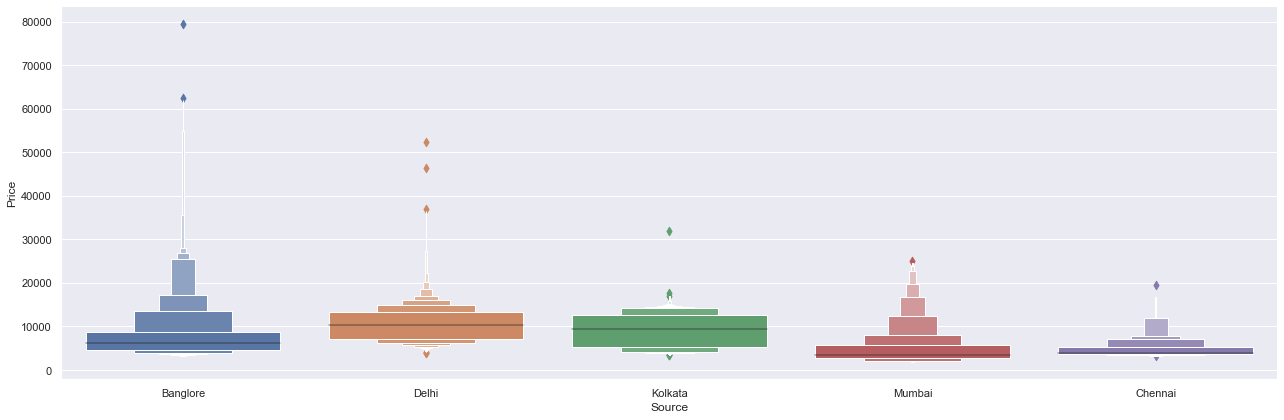

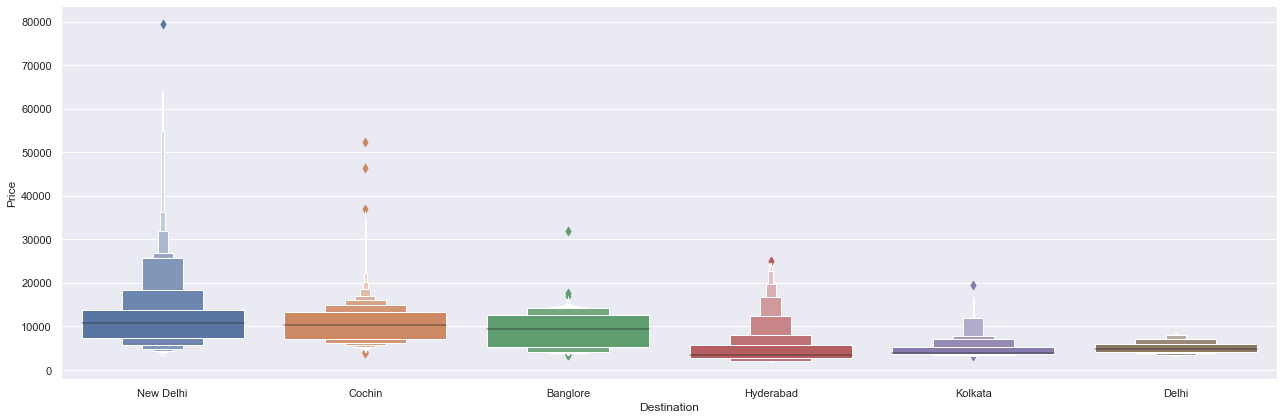

In [11]:
#Encoding part One-Hot-Encoding or Label Encoding
# Compare Airline and Price 
sns.catplot(y= "Price", x = "Airline", data = train_data.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 3)
# Compare Source and Price
sns.catplot(y = "Price", x= "Source", data = train_data.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()
# Compare Destination and Price
sns.catplot(y = "Price", x= "Destination", data = train_data.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 3)


In [12]:
#Airline, Source, Destination are all Nominal Categorical data.
#Use One Hot Encoding
Airline = train_data[["Airline"]]
Airline = pd.get_dummies(Airline, drop_first =True)

Source =train_data[["Source"]]
Source =pd.get_dummies(Source, drop_first=True)

Destination =train_data[["Destination"]]
Destination =pd.get_dummies(Destination, drop_first=True)

Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [13]:
Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [14]:
Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [15]:
#Drop Route and Additional_Info columns
#Route is related to Total_Stops; Additional_Info contains lots of no_info 
train_data.drop(["Route","Additional_Info"],axis=1, inplace=True)

In [16]:
#Total_Stops is the Ordinal Categorical data, perform LabelEncoder
train_data.replace({"non-stop":0, "1 stop": 1, "2 stops": 2, "3 stops":3, "4 stops": 4}, inplace=True)

In [17]:
#Concatenate dataframe
data_train =pd.concat([train_data,Airline,Source,Destination], axis=1)
data_train.drop(["Airline","Source", "Destination"], axis=1, inplace=True)
data_train.shape

(10682, 30)

In [20]:
#Test set
#Data Cleaning
test_data =pd.read_excel(r"D://asu//Big data data//flight fare prediction//Test_set.xlsx")
test_data.dropna(inplace = True)

# EDA
test_data["Journey_day"] = pd.to_datetime(test_data.Date_of_Journey, format="%d/%m/%Y").dt.day
test_data["Journey_month"] = pd.to_datetime(test_data["Date_of_Journey"], format = "%d/%m/%Y").dt.month

test_data["Dep_hour"] = pd.to_datetime(test_data["Dep_Time"]).dt.hour
test_data["Dep_min"] = pd.to_datetime(test_data["Dep_Time"]).dt.minute

test_data["Arrival_hour"] = pd.to_datetime(test_data.Arrival_Time).dt.hour
test_data["Arrival_min"] = pd.to_datetime(test_data.Arrival_Time).dt.minute

# Duration
duration = list(test_data["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"
        else:
            duration[i] = "0h " + duration[i]

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))
test_data["Duration_hours"] = duration_hours
test_data["Duration_mins"] = duration_mins

#Drop the original columns
test_data.drop(["Date_of_Journey"], axis = 1, inplace = True)
test_data.drop(["Dep_Time"], axis = 1, inplace = True)
test_data.drop(["Arrival_Time"], axis = 1, inplace = True)
test_data.drop(["Duration"], axis = 1, inplace = True)

#Encoding Categorical data
#OneHotCode
Airline = pd.get_dummies(test_data["Airline"], drop_first= True)
Source = pd.get_dummies(test_data["Source"], drop_first= True)
Destination = pd.get_dummies(test_data["Destination"], drop_first = True)
#LabelEncode
test_data.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)
#Drop Route and Additional_Info columns
test_data.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

data_test = pd.concat([test_data, Airline, Source, Destination], axis = 1)
data_test.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)
data_test.shape

(2671, 28)

In [37]:
data_test.head(20)

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,1,6,6,17,30,4,25,10,55,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
1,1,12,5,6,20,10,20,4,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,1,21,5,19,15,19,0,23,45,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,21,5,8,0,21,0,13,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0
4,0,24,6,23,55,2,45,2,50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
5,1,12,6,18,15,12,35,18,20,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
6,1,12,3,7,30,22,35,15,5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
7,1,1,5,15,15,20,30,5,15,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
8,0,15,3,10,10,12,55,2,45,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
9,1,18,5,16,30,22,35,6,5,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


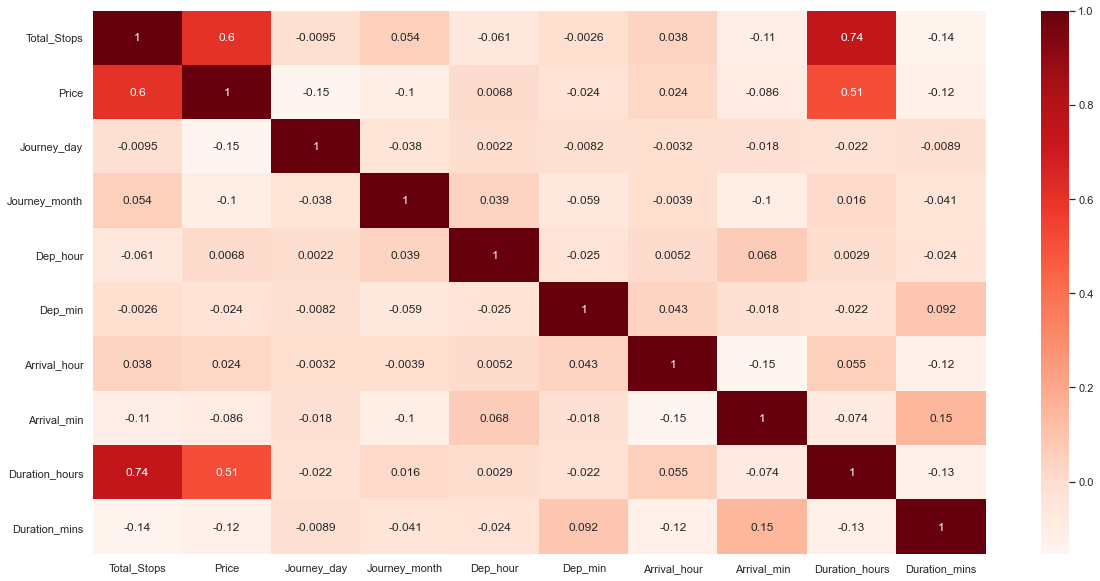

In [46]:
#train_data without target
X = data_train.drop(columns=["Price"])
#Train target - Price Column
Y = data_train["Price"].values
#Feature Selection
#Heatmap
train_corr = train_data.corr()
plt.figure(figsize = (20,10))
sns.heatmap(train_corr,annot= True, cmap = "Reds")
plt.show()

In [39]:
#Random Forest Model

from sklearn.model_selection import train_test_split
X_train, X_test,Y_train,Y_test =train_test_split(X,Y,test_size = 0.2, random_state = 0)

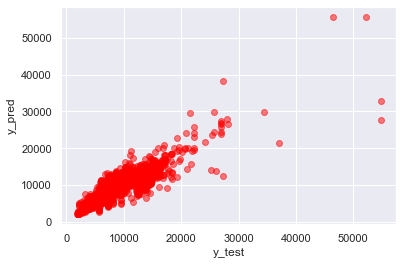

In [40]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train,Y_train)

Y_pred =rf.predict(X_test)
plt.scatter(y_test,Y_pred,alpha =0.5,color="Red")
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [41]:
from sklearn import metrics
metrics.r2_score(Y_test, Y_pred)

0.8165162566448815

In [42]:
import pickle
file = open('flightRf.pkl', 'wb')

# dump information to that file
pickle.dump(rf, file)